In [105]:
# 做一些简单的数据清洗工作

In [106]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)
sns.set(style='whitegrid', font='simhei')

In [107]:
from utils import *

In [108]:
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)

# 处理trip数据：
1. 剔除测试数据，不合理的GPS数据，修正一些可修复数据
2. 为每一个subtrip添加距离
3. 按日期重新分配

In [109]:
path = r'D:\Zhejiang University\Graduate Project\Data\Data\trip.csv'
data = pd.read_csv(path).iloc[:, 1:]
data.head()

,用户ID,星期,日期,Trip_ID,出行目的,第几次出行,出发地点经纬度,出发地点名义信息,到达地点经纬度,到达地点名义信息,...,年龄,宿舍区,年级,专业大类,自行车保有,电动车保有,汽车保有,校内主要出行方式,校外主要出行方式,Source
0,iOSiOS,﻿Thu,2018/03/08,iOSiOS0000,1,0,"('0', '0')",hhhstart,"('0', '0')",hhhend,...,None,None,None,None,None,None,None,None,None,iOS
1,iOSiOS,Thu,2018/03/08,iOSiOS0001,1,1,"('0', '0')",hhhstart,"('0', '0')",hhhend,...,None,None,None,None,None,None,None,None,None,iOS
2,iOSlalala,Thu,2018/03/08,iOSlalala0000,1,0,"('0', '0')",hhhstart,"('0', '0')",hhhend,...,None,None,None,None,None,None,None,None,None,iOS
3,iOSlalala,Thu,2018/03/08,iOSlalala0001,1,1,"('0', '0')",hhhstart,"('0', '0')",hhhend,...,None,None,None,None,None,None,None,None,None,iOS
4,aiOS,Thu,2018/03/08,aiOS0000,1,0,"('0', '0')",hhhstartiOS,"('0', '0')",hhhendiOS,...,None,None,None,None,None,None,None,None,None,iOS


In [110]:
# 统计用户ID信息，剔除不合理的
persons = data['用户ID'].unique()
persons

array(['iOSiOS', 'iOSlalala', 'aiOS', 'testfromiOS', 'testiOS', 'a331',
       '868233037531058', 'fff', 'ffff', 'fffff', '99000661510877',
       'lalala', '7BA36027-572D-4A66-9BED-16E514776D7A',
       'AA80BA72-454E-4FC3-B08C-E71BE39795DE', '862828038803111',
       '866952039548511', '9E7108A8-1CE5-4205-9F84-FFF591ACF296',
       '352575073151131', nan, '866111031277674', '868464032175811',
       'B3CBF519-A0E8-4E59-89CD-A0010CFD04B2',
       '1B9E6765-2FF2-41BF-8746-8B7F8B90C634',
       'E481BA02-683F-4D39-BF1C-D2511F38748D', '99001028893689',
       '1BA8B59E-1EDE-4C06-9440-73BD8A6D8D9B',
       '9F8854F0-6B11-45D1-9ECC-F4CEDDB7567D',
       '5EAE71AB-B3E1-4248-ABF8-AF93FA4F7A14',
       'A9640936-2976-4043-AEBC-E4C46392F7CA', '862891032124520',
       '866342032675489', '867977033978538', '864360036109489',
       '7DF282B6-CF38-4B98-974C-62CB593B7737',
       '47A65412-C863-4CAB-B6AC-0312BDB9F290',
       '460FAD4B-1357-45A6-8AEB-504F8E716CAD', '866296033225316',
       '7A07

In [111]:
# 剔除 iOSiOS, iOSlalala, aiOS, testfromiOS, testiOS, a331, fff, ffff, fffff, lalala, nan
persons = data['用户ID'].unique()
p = list(persons)
p.remove(p[18])
not_wanted = ['iOSiOS', 'iOSlalala', 'aiOS', 'testfromiOS', 'testiOS', 'a331', 'fff', 'ffff', 'fffff', 'lalala']
wanted = delete_user(p,not_wanted)
data = data[data['用户ID'].isin(wanted)]
persons = data['用户ID'].unique()
print(persons)

['868233037531058' '99000661510877' '7BA36027-572D-4A66-9BED-16E514776D7A'
 'AA80BA72-454E-4FC3-B08C-E71BE39795DE' '862828038803111'
 '866952039548511' '9E7108A8-1CE5-4205-9F84-FFF591ACF296'
 '352575073151131' '866111031277674' '868464032175811'
 'B3CBF519-A0E8-4E59-89CD-A0010CFD04B2'
 '1B9E6765-2FF2-41BF-8746-8B7F8B90C634'
 'E481BA02-683F-4D39-BF1C-D2511F38748D' '99001028893689'
 '1BA8B59E-1EDE-4C06-9440-73BD8A6D8D9B'
 '9F8854F0-6B11-45D1-9ECC-F4CEDDB7567D'
 '5EAE71AB-B3E1-4248-ABF8-AF93FA4F7A14'
 'A9640936-2976-4043-AEBC-E4C46392F7CA' '862891032124520'
 '866342032675489' '867977033978538' '864360036109489'
 '7DF282B6-CF38-4B98-974C-62CB593B7737'
 '47A65412-C863-4CAB-B6AC-0312BDB9F290'
 '460FAD4B-1357-45A6-8AEB-504F8E716CAD' '866296033225316'
 '7A078855-02A6-4E2B-B8D8-D36975A0ECC4' '865762039355903'
 '865297030939330' 'F99C8D91-CB76-4C9B-B15D-C08D829E3E59'
 '867905023959440' '865296037249875'
 'AF4B4BF7-70BD-4F57-ABF4-A17A5A66FFA4' '866822038556965'
 '15E135A9-A2E4-4BA8-AD4F-85A2AC810

C:\Users\yuhao\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\yuhao\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\yuhao\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

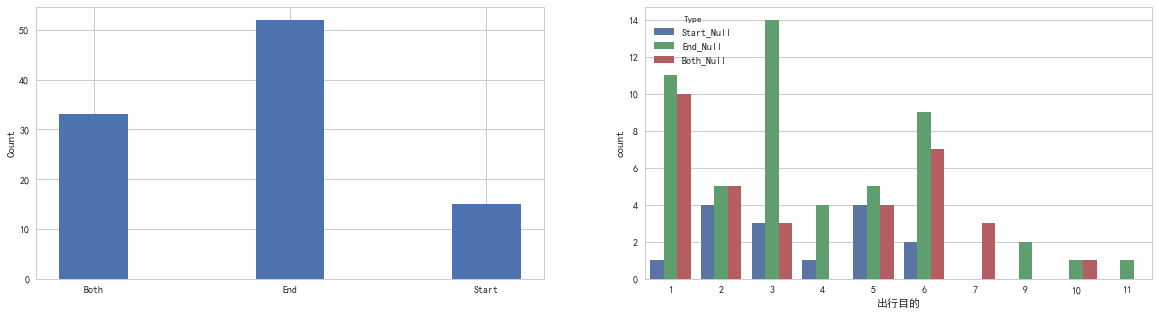

In [113]:
# GPS问题
start_gps = data['出发地点经纬度']
end_gps = data['到达地点经纬度']
# 无效GPS数据为 ('0', '0')
start_null = data[(start_gps == "('0', '0')") & (end_gps != "('0', '0')")]
end_null = data[(end_gps == "('0', '0')") & (start_gps != "('0', '0')")]
both_null = data[(start_gps == "('0', '0')") & (end_gps == "('0', '0')")]
null_gps_data = data[(start_gps == "('0', '0')") | (end_gps == "('0', '0')")]

# 绘制图像
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(20, 5))
axis1.bar(['Start', 'End', 'Both'], [start_null.count()[0], end_null.count()[0], both_null.count()[0]], width=0.35)
axis1.set_ylabel('Count')

# 处理数据
start_null['Type'] = 'Start_Null'
end_null['Type'] = 'End_Null'
both_null['Type'] = 'Both_Null'
gps_null = pd.concat([start_null, end_null, both_null], ignore_index=True)
sns.countplot(x='出行目的', data=gps_null, hue='Type', ax=axis2)

['办事', '上课', '就餐', '自习', '购物', '回寝室', '社团活动', '学术活动', '娱乐活动', '就医', '其他']
- 由上图一可知，End缺失时情况最多，并且集中于目的1, 3, 6
- Start缺失情况较分散
- both缺失集中于1，2，3，5，6
- 其中3和6的情况比较好确定，一般为大食堂和自己的寝室

In [114]:
# 首先处理回寝室的缺失
# 回寝室即End位置为寝室

## 1.收集所有人寝室的位置

In [119]:
dormitory = pd.DataFrame(columns=['用户ID', 'GPS', '名义信息'])
num = 0
for person in persons:
    p_data = data[data['用户ID'] == person]
    d_area = list(p_data[p_data['出行目的'] == 6]['到达地点经纬度'])
    d_info = list(p_data[p_data['出行目的'] == 6]['到达地点名义信息'])
    area = None
    info = None
    if d_area != area:
        for i in range(len(d_area)):
            if d_area[i] != "('0', '0')":
                area = d_area[i]
                info = d_info[i]
                break
    if area != None:
        dormitory.loc[num, :] = [person, area, info]
    num += 1

## 2.收集所有人就餐的位置

In [125]:
dinning_hall = pd.DataFrame(columns=['用户ID', 'GPS', '名义信息'])
num = 0
for person in persons:
    p_data = data[data['用户ID'] == person]
    d_area = list(p_data[p_data['出行目的'] == 3]['到达地点经纬度'])
    d_info = list(p_data[p_data['出行目的'] == 3]['到达地点名义信息'])
    print(person, '############################################')
    for i in range(len(d_area)):
        print(d_area[i], '###', d_info[i])
    print('                                                      ')

868233037531058 ############################################
                                                      
99000661510877 ############################################
                                                      
7BA36027-572D-4A66-9BED-16E514776D7A ############################################
                                                      
AA80BA72-454E-4FC3-B08C-E71BE39795DE ############################################
                                                      
862828038803111 ############################################
                                                      
866952039548511 ############################################
('30.313753019905633', '120.09099699999993') ### 浙江省杭州市西湖区迪臣中路浙江大学紫金港校区内,浙江大学(紫金港校区)-本科生院求是学院西183米
('30.3147480192541', '120.08876499999992') ### 浙江省杭州市西湖区迪臣路浙江大学(紫金港校区)内,浙江大学求是学院蓝田学园内0米
                                                      
9E7108A8-1CE5-4205-9F84-FFF591ACF296 #######################################

In [126]:
for person in persons:
    p_data = data[data['用户ID'] == person]
    d_area = list(p_data[p_data['出行目的'] == 3]['到达地点经纬度'])
    d_info = list(p_data[p_data['出行目的'] == 3]['到达地点名义信息'])
    area = None
    info = None
    if d_area != area:
        for i in range(len(d_area)):
            if d_area[i] != "('0', '0')":
                area = d_area[i]
                info = d_info[i]
                break
    if area != None:
        dinning_hall.loc[num, :] = [person, area, info]
    num += 1
dinning_hall

,用户ID,GPS,名义信息
5,866952039548511,"('30.313753019905633', '120.09099699999993')","浙江省杭州市西湖区迪臣中路浙江大学紫金港校区内,浙江大学(紫金港校区)-本科生院求是学院西183米"
7,352575073151131,"('30.30965790239354', '120.09160345180433')","浙江省杭州市西湖区宜山路浙江大学紫金港校区内,浙江大学(紫金港校区)西教学区1栋-107号楼..."
12,E481BA02-683F-4D39-BF1C-D2511F38748D,"('30.30978895399306', '120.0920553927951')",NaN
13,99001028893689,"('30.313063020358364', '120.09022699999991')","浙江省杭州市西湖区迪臣中路浙江大学紫金港校区内,浙江大学(紫金港校区)-排球场东146米"
16,5EAE71AB-B3E1-4248-ABF8-AF93FA4F7A14,"('30.30761664496528', '120.0835986328125')",浙江省杭州市西湖区三墩镇迪臣中路浙江大学紫金港校区
18,862891032124520,"('30.313610343475627', '120.0910625412362')","浙江省杭州市西湖区迪臣中路浙江大学紫金港校区内,浙江大学(紫金港校区)-本科生院求是学院西178米"
19,866342032675489,"('30.3133307446328', '120.09046385686146')","浙江省杭州市西湖区迪臣中路浙江大学紫金港校区内,浙江大学(紫金港校区)-排球场东182米"
20,867977033978538,"('30.314344585473552', '120.09302460995696')","浙江省杭州市西湖区藉舫路浙江大学紫金港校区内,浙江大学校医院紫金港校区白沙内0米"
21,864360036109489,"('30.31468101929793', '120.08891699999992')","浙江省杭州市西湖区迪臣路浙江大学(紫金港校区)内,浙江大学求是学院蓝田学园内0米"
22,7DF282B6-CF38-4B98-974C-62CB593B7737,"('30.30832275390625', '120.08667860243055')",NaN


## 3.收集就医信息

In [128]:
hospital = pd.DataFrame(columns=['用户ID', 'GPS', '名义信息'])
num = 0
for person in persons:
    p_data = data[data['用户ID'] == person]
    d_area = list(p_data[p_data['出行目的'] == 6]['到达地点经纬度'])
    d_info = list(p_data[p_data['出行目的'] == 6]['到达地点名义信息'])
    area = None
    info = None
    if d_area != area:
        for i in range(len(d_area)):
            if d_area[i] != "('0', '0')":
                area = d_area[i]
                info = d_info[i]
                break
    if area != None:
        hospital.loc[num, :] = [person, area, info]
    num += 1
hospital

,用户ID,GPS,名义信息
0,868233037531058,"('30.275186046373253', '120.13217599999993')","浙江省杭州市西湖区西溪路374号浙江大学玉泉校区内,浙江大学(玉泉校区)-学生公寓26栋北85米"
6,9E7108A8-1CE5-4205-9F84-FFF591ACF296,"('30.315057834201387', '120.21628976779513')",浙江省杭州市江干区笕桥镇机场路368号杭州市江干职业高级中学
9,868464032175811,"('30.31374401991154', '120.09096099999992')","浙江省杭州市西湖区迪臣中路浙江大学紫金港校区内,浙江大学(紫金港校区)-本科生院求是学院西187米"
10,B3CBF519-A0E8-4E59-89CD-A0010CFD04B2,"('30.30851372612847', '120.08667914496527')",浙江省杭州市西湖区三墩镇浙江大学紫金港校区白沙二舍浙江大学紫金港校区
12,E481BA02-683F-4D39-BF1C-D2511F38748D,"('30.31139594184028', '120.0901060655382')",浙江省杭州市西湖区三墩镇望月公寓
13,99001028893689,"('30.313152020299924', '120.07802399999993')",浙江省杭州市西湖区石祥西路华电电力科学研究院东南305米
15,9F8854F0-6B11-45D1-9ECC-F4CEDDB7567D,"('30.310381130642362', '120.08565999348959')",浙江省杭州市西湖区三墩镇泰和路浙江大学紫金港校区
16,5EAE71AB-B3E1-4248-ABF8-AF93FA4F7A14,"('30.30822048611111', '120.0831236436632')",浙江省杭州市西湖区三墩镇迪臣中路浙江大学紫金港校区
18,862891032124520,"('30.31436001374123', '120.09321197636113')","浙江省杭州市西湖区藉舫路浙江大学紫金港校区内,浙江大学(紫金港校区)白沙综合楼-白沙2舍附近40米"
19,866342032675489,"('30.31453878971659', '120.09306925236085')","浙江省杭州市西湖区藉舫路浙江大学紫金港校区内,浙江大学(紫金港校区)白沙综合楼-白沙1舍附近32米"
